# 強者用PyTorch - 預測房價

In [36]:
import torch
import numpy as np

In [37]:
from torch.autograd import Variable

# 1. 準備數據

In [38]:
x = Variable(torch.linspace(0,100).type(torch.FloatTensor))
x

tensor([  0.0000,   1.0101,   2.0202,   3.0303,   4.0404,   5.0505,   6.0606,
          7.0707,   8.0808,   9.0909,  10.1010,  11.1111,  12.1212,  13.1313,
         14.1414,  15.1515,  16.1616,  17.1717,  18.1818,  19.1919,  20.2020,
         21.2121,  22.2222,  23.2323,  24.2424,  25.2525,  26.2626,  27.2727,
         28.2828,  29.2929,  30.3030,  31.3131,  32.3232,  33.3333,  34.3434,
         35.3535,  36.3636,  37.3737,  38.3838,  39.3939,  40.4040,  41.4141,
         42.4242,  43.4343,  44.4444,  45.4545,  46.4646,  47.4747,  48.4848,
         49.4949,  50.5051,  51.5152,  52.5253,  53.5354,  54.5455,  55.5556,
         56.5657,  57.5758,  58.5859,  59.5960,  60.6061,  61.6162,  62.6263,
         63.6364,  64.6465,  65.6566,  66.6667,  67.6768,  68.6869,  69.6970,
         70.7071,  71.7172,  72.7273,  73.7374,  74.7475,  75.7576,  76.7677,
         77.7778,  78.7879,  79.7980,  80.8081,  81.8182,  82.8283,  83.8384,
         84.8485,  85.8586,  86.8687,  87.8788,  88.8889,  89.89

In [39]:
rand = torch.randn(100) * 10 #随机生成100个满足标准正态分布的随机数，均值为0，方差为1.将这个数字乘以10，标准方差变为10
y = x + rand #将x和rand相加，得到伪造的标签数据y。所以(x,y)应能近似地落在y=x这条直线上

In [40]:
x_train = x[: -10]
x_test = x[-10 :]
y_train = y[: -10]
y_test = y[-10 :]

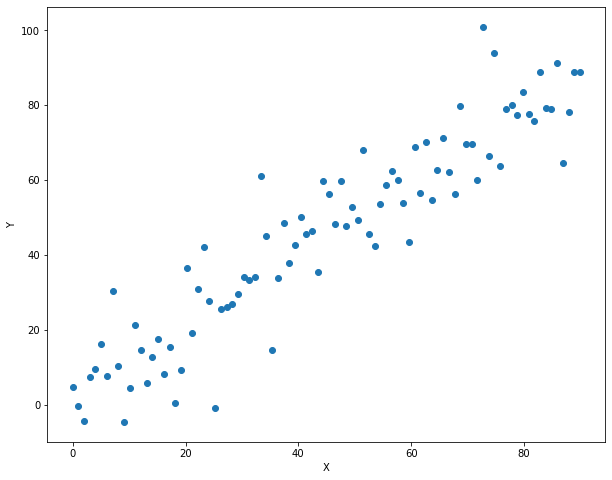

In [41]:
import matplotlib.pyplot as plt #导入画图的程序包

plt.figure(figsize=(10,8)) #设定绘制窗口大小为10*8 inch
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'o') 
plt.xlabel('X') #添加X轴的标注
plt.ylabel('Y') #添加Y周的标注
plt.show() #将图形画在下面

# 2. 構造模型，計算損失函數

In [42]:
a = Variable(torch.rand(1),requires_grad=True)
b = Variable(torch.rand(1),requires_grad=True)
print('Initial parameters:', [a, b])

Initial parameters: [tensor([0.8141], requires_grad=True), tensor([0.0368], requires_grad=True)]


In [43]:
learning_rate = 0.0001

In [44]:
for i in range(1000):
    predictions = a.expand_as(x_train) * x_train + b.expand_as(x_train)  #计算在当前a、b条件下的模型预测数值
    loss = torch.mean((predictions - y_train) ** 2) #通过与标签数据y比较，计算误差
    print('loss:', loss)
    loss.backward() #对损失函数进行梯度反传
    a.data.add_(- learning_rate * a.grad.data)  #利用上一步计算中得到的a的梯度信息更新a中的data数值
    b.data.add_(- learning_rate * b.grad.data)  #利用上一步计算中得到的b的梯度信息更新b中的data数值
    ### 增加了这部分代码，清空存储在变量a，b中的梯度信息，以免在backward的过程中会反复不停地累加
    a.grad.data.zero_() #清空a的梯度数值
    b.grad.data.zero_() #清空b的梯度数值

loss: tensor(193.7543, grad_fn=<MeanBackward0>)
loss: tensor(118.0230, grad_fn=<MeanBackward0>)
loss: tensor(102.1347, grad_fn=<MeanBackward0>)
loss: tensor(98.8013, grad_fn=<MeanBackward0>)
loss: tensor(98.1018, grad_fn=<MeanBackward0>)
loss: tensor(97.9549, grad_fn=<MeanBackward0>)
loss: tensor(97.9240, grad_fn=<MeanBackward0>)
loss: tensor(97.9174, grad_fn=<MeanBackward0>)
loss: tensor(97.9158, grad_fn=<MeanBackward0>)
loss: tensor(97.9154, grad_fn=<MeanBackward0>)
loss: tensor(97.9151, grad_fn=<MeanBackward0>)
loss: tensor(97.9149, grad_fn=<MeanBackward0>)
loss: tensor(97.9148, grad_fn=<MeanBackward0>)
loss: tensor(97.9146, grad_fn=<MeanBackward0>)
loss: tensor(97.9144, grad_fn=<MeanBackward0>)
loss: tensor(97.9142, grad_fn=<MeanBackward0>)
loss: tensor(97.9141, grad_fn=<MeanBackward0>)
loss: tensor(97.9139, grad_fn=<MeanBackward0>)
loss: tensor(97.9137, grad_fn=<MeanBackward0>)
loss: tensor(97.9135, grad_fn=<MeanBackward0>)
loss: tensor(97.9134, grad_fn=<MeanBackward0>)
loss: tens

loss: tensor(97.8570, grad_fn=<MeanBackward0>)
loss: tensor(97.8568, grad_fn=<MeanBackward0>)
loss: tensor(97.8566, grad_fn=<MeanBackward0>)
loss: tensor(97.8564, grad_fn=<MeanBackward0>)
loss: tensor(97.8563, grad_fn=<MeanBackward0>)
loss: tensor(97.8561, grad_fn=<MeanBackward0>)
loss: tensor(97.8559, grad_fn=<MeanBackward0>)
loss: tensor(97.8558, grad_fn=<MeanBackward0>)
loss: tensor(97.8556, grad_fn=<MeanBackward0>)
loss: tensor(97.8555, grad_fn=<MeanBackward0>)
loss: tensor(97.8553, grad_fn=<MeanBackward0>)
loss: tensor(97.8551, grad_fn=<MeanBackward0>)
loss: tensor(97.8549, grad_fn=<MeanBackward0>)
loss: tensor(97.8548, grad_fn=<MeanBackward0>)
loss: tensor(97.8546, grad_fn=<MeanBackward0>)
loss: tensor(97.8544, grad_fn=<MeanBackward0>)
loss: tensor(97.8543, grad_fn=<MeanBackward0>)
loss: tensor(97.8541, grad_fn=<MeanBackward0>)
loss: tensor(97.8539, grad_fn=<MeanBackward0>)
loss: tensor(97.8538, grad_fn=<MeanBackward0>)
loss: tensor(97.8536, grad_fn=<MeanBackward0>)
loss: tensor(

loss: tensor(97.7972, grad_fn=<MeanBackward0>)
loss: tensor(97.7971, grad_fn=<MeanBackward0>)
loss: tensor(97.7969, grad_fn=<MeanBackward0>)
loss: tensor(97.7967, grad_fn=<MeanBackward0>)
loss: tensor(97.7966, grad_fn=<MeanBackward0>)
loss: tensor(97.7964, grad_fn=<MeanBackward0>)
loss: tensor(97.7963, grad_fn=<MeanBackward0>)
loss: tensor(97.7961, grad_fn=<MeanBackward0>)
loss: tensor(97.7959, grad_fn=<MeanBackward0>)
loss: tensor(97.7958, grad_fn=<MeanBackward0>)
loss: tensor(97.7956, grad_fn=<MeanBackward0>)
loss: tensor(97.7954, grad_fn=<MeanBackward0>)
loss: tensor(97.7953, grad_fn=<MeanBackward0>)
loss: tensor(97.7951, grad_fn=<MeanBackward0>)
loss: tensor(97.7950, grad_fn=<MeanBackward0>)
loss: tensor(97.7948, grad_fn=<MeanBackward0>)
loss: tensor(97.7946, grad_fn=<MeanBackward0>)
loss: tensor(97.7945, grad_fn=<MeanBackward0>)
loss: tensor(97.7943, grad_fn=<MeanBackward0>)
loss: tensor(97.7942, grad_fn=<MeanBackward0>)
loss: tensor(97.7940, grad_fn=<MeanBackward0>)
loss: tensor(

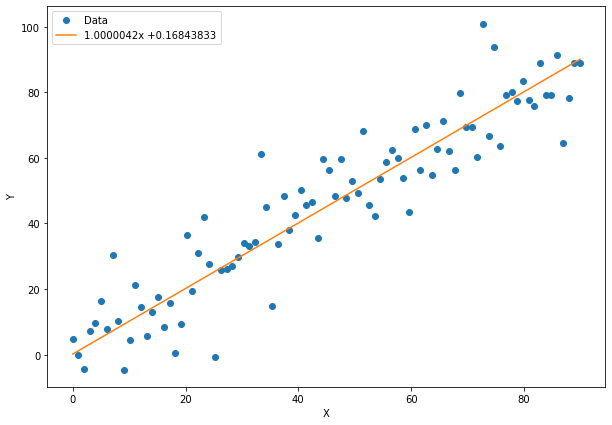

In [45]:
x_data = x_train.data.numpy() # 获得x包裹的数据
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
xplot, = plt.plot(x_data, y_train.numpy(), 'o') # 绘制原始数据
yplot, = plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())  #绘制拟合数据
plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0]) #图例信息
plt.legend([xplot, yplot],['Data', str1]) #绘制图例
plt.show()

# 3. 預測

In [46]:
predictions = a.expand_as(x_test) * x_test + b.expand_as(x_test) #计算模型的预测结果
predictions #输出

tensor([ 91.0779,  92.0880,  93.0981,  94.1082,  95.1183,  96.1284,  97.1385,
         98.1487,  99.1588, 100.1689], grad_fn=<AddBackward0>)

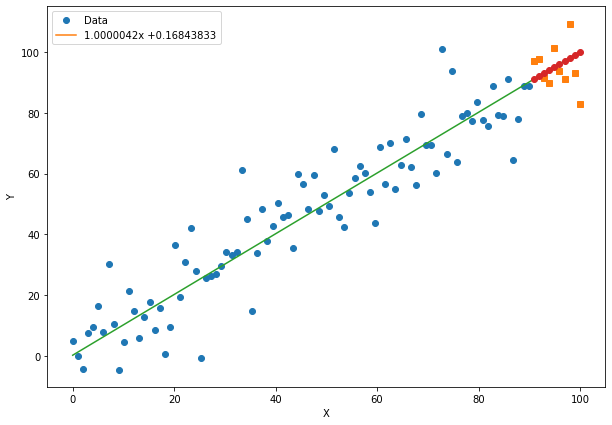

In [47]:
x_data = x_train.data.numpy() # 获得x包裹的数据
x_pred = x_test.data.numpy()
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
plt.plot(x_data, y_train.data.numpy(), 'o') # 绘制训练数据
plt.plot(x_pred, y_test.data.numpy(), 's') # 绘制测试数据
x_data = np.r_[x_data, x_test.data.numpy()]
plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())  #绘制拟合数据
plt.plot(x_pred, a.data.numpy() * x_pred + b.data.numpy(), 'o') #绘制预测数据

plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0]) #图例信息
plt.legend([xplot, yplot],['Data', str1]) #绘制图例
plt.show()

### 方塊點：測試集中實際的房價資料
### 直線上的小點：測試集上預測的房價資料

---

# 單車預測器

## BOOK

In [1]:
import numpy as np
import pandas as pd #读取csv文件的库

import torch
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt

# 让输出的图形直接在Notebook中显示
%matplotlib inline

In [2]:
#读取数据到内存中，rides为一个dataframe对象
data_path = 'Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)

#看看数据长什么样子
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


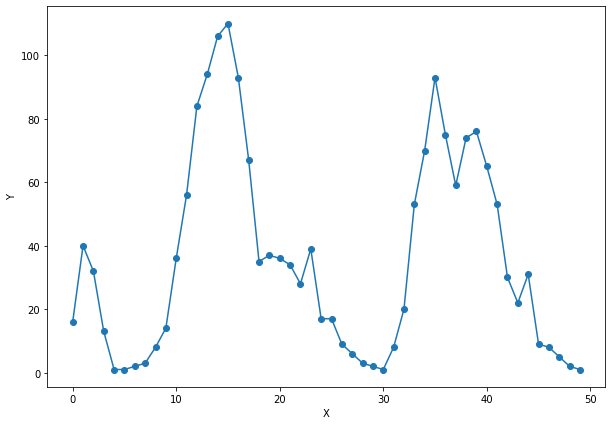

In [3]:
#我们取出数据库的最后一列的前50条记录来进行预测
counts = rides['cnt'][:50]

# 创建变量x，它是1，2，……，50
x = np.arange(len(counts))

# 将counts转成预测变量（标签）：y
y = np.array(counts)

# 绘制一个图形，展示曲线长的样子
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
plt.plot(x, y, 'o-') # 绘制原始数据
plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注
plt.show()

In [6]:
counts = rides['cnt'][:50]
# 輸入變數 1,2,3,...這樣的一維陣列
x = Variable(torch.FloatTensor(np.arange(len(counts), dtype=float)))

# 輸出變數，他是從資料 counts中讀取的每一時刻的單車數，共50個資料點的一維陣列，作為標準答案
y = Variable(torch.FloatTensor(np.array(counts, dtype=float)))

#設定隱藏層神經元的數量
sz =10 
w = 45
# 初始化輸入層到隱藏層的加權矩陣，他的尺寸是(1,10)
weights = Variable(w*torch.randn(1,sz).type(torch.FloatTensor), requires_grad = True) 

# 初始化隱藏層節點的偏置向量。他是尺寸為10的一維向量
biases  = Variable(w*torch.randn(sz).type(torch.FloatTensor), requires_grad = True) 

# 初始化從隱藏層到輸出層的全矩陣，她的尺寸是(10,1)
weights2 = Variable(w*torch.randn(sz,1).type(torch.FloatTensor), requires_grad = True) 
# print('Initial parameters:',"\n", sz,"\n",weights,"\n",baises,"\n",weights2)

In [7]:
print(x)
print(y)
print(weights)
print(biases)
print(weights2)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49.])
tensor([ 16.,  40.,  32.,  13.,   1.,   1.,   2.,   3.,   8.,  14.,  36.,  56.,
         84.,  94., 106., 110.,  93.,  67.,  35.,  37.,  36.,  34.,  28.,  39.,
         17.,  17.,   9.,   6.,   3.,   2.,   1.,   8.,  20.,  53.,  70.,  93.,
         75.,  59.,  74.,  76.,  65.,  53.,  30.,  22.,  31.,   9.,   8.,   5.,
          2.,   1.])
tensor([[ 15.4411,  29.4133,  39.2424, -60.6560,  29.9085,   2.7000, -36.9521,
         -66.6424,  34.3852, -73.0880]], requires_grad=True)
tensor([  5.9912,  60.2247,  80.6279,  31.5121,  66.1501, -38.3076,  31.8895,
         51.8520,   7.5963, -71.8917], requires_grad=True)
tensor([[ 17.9057],
        [-22.9292],
        [ -5.2658],
        [ 18.4558],
        [-34.0340],

In [13]:
learning_rate = 0.0001 #设置学习率
losses = []
for i in range(100000):
    # 從輸入層到隱藏層的計算
    hidden = x.expand(sz, len(x)).t()* weights.expand(len(x), sz) + biases.expand(len(x), sz)
    #此時，hidden變數的尺寸是：(50,10)，即50個資料點，10個隱藏層神經元

    # 將sigmoid函數作用在隱藏層的每一個神經元上
    hidden = torch.sigmoid(hidden)
    
    # 隱藏層輸出到輸出層，計算獲得最後預測
    predictions = hidden.mm(weights2)
    
    # 此時，predictions的尺寸為：(50,1)，即50個資料點的預測數值
    # 透過與資料中的標準答案y做比較，計算均方誤差
    loss = torch.mean((predictions - y) ** 2)
    
    #此時，loss為一個純量，即一個數
    losses.append(loss.data.numpy())
    
    if i % 10000 == 0:
      print('loss:', loss)
    
    # *****************************************************
    # 接下來開始梯度向降演算法，將誤差反向傳播
    loss.backward() #对损失函数进行梯度反传
    
    # 利用上一步計算中獲得的weights，biases等梯度資訊更新weights或biases的數值
    weights.data.add_(  - learning_rate * weights.grad.data  )  
    biases.data.add_(   - learning_rate * biases.grad.data   )
    weights2.data.add_( - learning_rate * weights2.grad.data )
    
    # 清空所有變數的梯度值
    weights.grad.data.zero_() 
    biases.grad.data.zero_() 
    weights2.grad.data.zero_() 

loss: tensor(1010.9456, grad_fn=<MeanBackward0>)
loss: tensor(1010.9456, grad_fn=<MeanBackward0>)
loss: tensor(1010.9456, grad_fn=<MeanBackward0>)
loss: tensor(1010.9456, grad_fn=<MeanBackward0>)
loss: tensor(1010.9456, grad_fn=<MeanBackward0>)
loss: tensor(1010.9456, grad_fn=<MeanBackward0>)
loss: tensor(1010.9456, grad_fn=<MeanBackward0>)
loss: tensor(1010.9456, grad_fn=<MeanBackward0>)
loss: tensor(1010.9456, grad_fn=<MeanBackward0>)
loss: tensor(1010.9456, grad_fn=<MeanBackward0>)


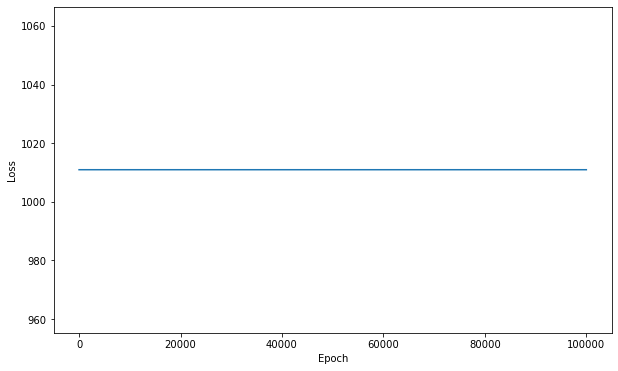

In [15]:
plt.figure(figsize = (10, 6)) #设定绘图窗口大小
plt.plot(losses)
# plt.axis([0, 1000000, 1010.8, 1011.2])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

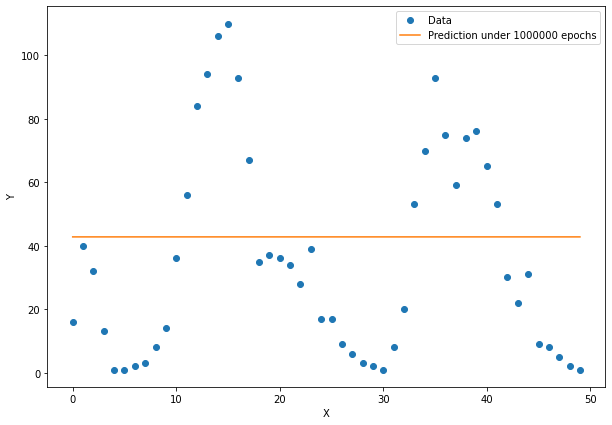

In [570]:
# 绘制图形，展现线性回归的效果，结果惨不忍睹

x_data = x.data.numpy() # 获得x包裹的数据
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
xplot, = plt.plot(x_data, y.data.numpy(), 'o') # 绘制原始数据
yplot, = plt.plot(x_data, predictions.data.numpy())  #绘制拟合数据
plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注

plt.legend([xplot, yplot],['Data', 'Prediction under 1000000 epochs']) #绘制图例
plt.show()

---

## Website

In [16]:
#导入需要使用的库
import numpy as np
import pandas as pd #读取csv文件的库
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

# 让输出的图形直接在Notebook中显示
%matplotlib inline

In [17]:
#读取数据到内存中，rides为一个dataframe对象
data_path = 'Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)

#看看数据长什么样子
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


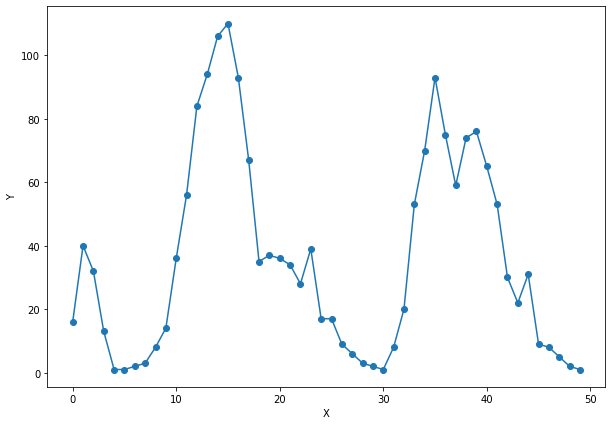

In [18]:
#我们取出最后一列的前50条记录来进行预测
counts = rides['cnt'][:50]

#获得变量x，它是1，2，……，50
x = np.arange(len(counts))

# 将counts转成预测变量（标签）：y
y = np.array(counts)

# 绘制一个图形，展示曲线长的样子
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
plt.plot(x, y, 'o-') # 绘制原始数据
plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注
plt.show()

In [23]:
#取出数据库中的最后一列的前50条记录来进行预测
counts = rides['cnt'][:50]

#创建变量x，它是1，2，……，50
x = torch.tensor(np.arange(len(counts), dtype = float)/ len(counts), requires_grad = True)

# 将counts转成预测变量（标签）：y
y = torch.tensor(np.array(counts, dtype = float), requires_grad = True)

# 设置隐含层神经元的数量
sz = 10

# 初始化所有神经网络的权重（weights）和阈值（biases）
weights = torch.randn((1, sz), dtype = torch.double, requires_grad = True) #1*10的输入到隐含层的权重矩阵
biases = torch.randn(sz, dtype = torch.double, requires_grad = True) #尺度为10的隐含层节点偏置向量
weights2 = torch.randn((sz, 1), dtype = torch.double, requires_grad = True) #10*1的隐含到输出层权重矩阵

learning_rate = 0.001 #设置学习率
losses = []

# 将 x 转换为(50,1)的维度，以便与维度为(1,10)的weights矩阵相乘
x = x.view(50, -1)
# 将 y 转换为(50,1)的维度
y = y.view(50, -1)

for i in range(100000):
    # 从输入层到隐含层的计算
    hidden = x * weights + biases
    # 将sigmoid函数作用在隐含层的每一个神经元上
    hidden = torch.sigmoid(hidden)
    #print(hidden.size())
    # 隐含层输出到输出层，计算得到最终预测
    predictions = hidden.mm(weights2)#
    #print(predictions.size())
    # 通过与标签数据y比较，计算均方误差
    loss = torch.mean((predictions - y) ** 2) 
    #print(loss.size())
    losses.append(loss.data.numpy())
    
    # 每隔10000个周期打印一下损失函数数值
    if i % 10000 == 0:
        print('loss:', loss)
        
    #对损失函数进行梯度反传
    loss.backward()
    
    #利用上一步计算中得到的weights，biases等梯度信息更新weights或biases中的data数值
    weights.data.add_(- learning_rate * weights.grad.data)  
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)
    
    # 清空所有变量的梯度值。
    # 因为pytorch中backward一次梯度信息会自动累加到各个变量上，因此需要清空，否则下一次迭代会累加，造成很大的偏差
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()

loss: tensor(2401.3854, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(919.6616, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(720.4038, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(493.1544, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(261.8216, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(130.3149, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(86.4128, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(66.3011, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(55.0081, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(48.4489, dtype=torch.float64, grad_fn=<MeanBackward0>)


In [24]:
print(x)
print(y)
print(weights)
print(biases)
print(weights2)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]], dtype=torch.float64, grad_fn=<ViewBackward>)
tensor([[ 16.],
        [ 40.],
        [ 32.],
      

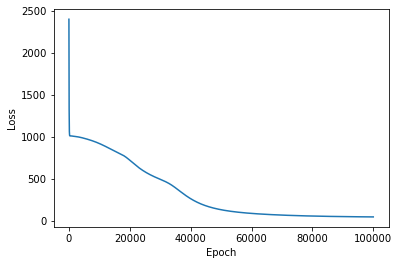

In [25]:
# 打印误差曲线
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

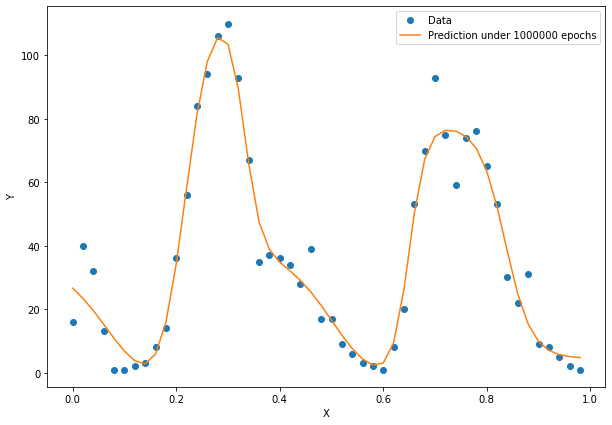

In [26]:
x_data = x.data.numpy() # 获得x包裹的数据
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
xplot, = plt.plot(x_data, y.data.numpy(), 'o') # 绘制原始数据

yplot, = plt.plot(x_data, predictions.data.numpy())  #绘制拟合数据
plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注
plt.legend([xplot, yplot],['Data', 'Prediction under 1000000 epochs']) #绘制图例
plt.show()

## 預測

tensor(6726.7905, dtype=torch.float64, grad_fn=<MeanBackward0>)


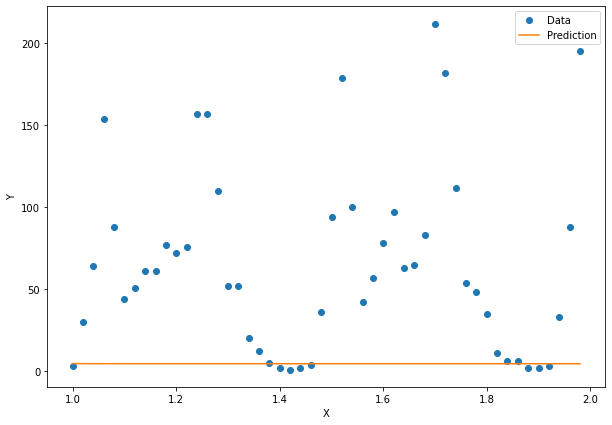

In [27]:
counts_predict = rides['cnt'][50:100] #读取待预测的接下来的50个数据点

#首先对接下来的50个数据点进行选取，注意x应该取51，52，……，100，然后再归一化
x = torch.tensor((np.arange(50, 100, dtype = float) / len(counts))
                 , requires_grad = True)
#读取下50个点的y数值，不需要做归一化
y = torch.tensor(np.array(counts_predict, dtype = float), requires_grad = True)

x = x.view(50, -1)
y = y.view(50, -1)

# 从输入层到隐含层的计算
hidden = x * weights + biases

# 将sigmoid函数作用在隐含层的每一个神经元上
hidden = torch.sigmoid(hidden)

# 隐含层输出到输出层，计算得到最终预测
predictions = hidden.mm(weights2)

# 计算预测数据上的损失函数
loss = torch.mean((predictions - y) ** 2) 
print(loss)


x_data = x.data.numpy() # 获得x包裹的数据
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
xplot, = plt.plot(x_data, y.data.numpy(), 'o') # 绘制原始数据
yplot, = plt.plot(x_data, predictions.data.numpy())  #绘制拟合数据
plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注
plt.legend([xplot, yplot],['Data', 'Prediction']) #绘制图例
plt.show()

### 結果-過擬合，模型可以在訓練資料上進行非常好的預測，但是在全新的測試資料中卻得不到好的表現。

# Solution

## 數據前處理
### 數據的特徵太少，而導致的過度擬合問題=>人工取特徵

In [28]:
#首先，让我们再来看看数据长什么样子
#读取数据到内存中，rides为一个dataframe对象
data_path = 'Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 數據前處理-One-Hot Encode

In [29]:
#对于类型变量的特殊处理
# season=1,2,3,4, weathersi=1,2,3, mnth= 1,2,...,12, hr=0,1, ...,23, weekday=0,1,...,6
# 经过下面的处理后，将会多出若干特征，例如，对于season变量就会有 season_1, season_2, season_3, season_4
# 这四种不同的特征。
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    #利用pandas对象，我们可以很方便地将一个类型变量属性进行one-hot编码，变成多个属性
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

# 把原有的类型变量对应的特征去掉，将一些不相关的特征去掉
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


## 數據前處理-歸一化(數值型態變數的處理)
### 變數的變化範圍不一致=>歸一化

In [30]:
# 调整所有的特征，标准化处理
quant_features = ['cnt', 'temp', 'hum', 'windspeed']
#quant_features = ['temp', 'hum', 'windspeed']

# 我们将每一个变量的均值和方差都存储到scaled_features变量中。
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [31]:
print(data['temp'][0])

-1.3346091869412686


In [32]:
rides['temp'][:10]

0    0.24
1    0.22
2    0.22
3    0.24
4    0.24
5    0.24
6    0.22
7    0.20
8    0.24
9    0.32
Name: temp, dtype: float64

## 數據前處理-將數據集進行分割
### 分割為訓練集 & 測試集
#### 資料少的話 10:1

In [33]:
# 将所有的数据集分为测试集和训练集，我们以后21天数据一共21*24个数据点作为测试集，其它是训练集
test_data = data[-21*24:]
train_data = data[:-21*24]
print('训练数据：',len(train_data),'测试数据：',len(test_data))

# 将我们的数据列分为特征列和目标列

#目标列
target_fields = ['cnt', 'casual', 'registered']
features, targets = train_data.drop(target_fields, axis=1), train_data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

# 将数据从pandas dataframe转换为numpy
X = features.values
Y = targets['cnt'].values
Y = Y.astype(float)

Y = np.reshape(Y, [len(Y),1])
losses = []

训练数据： 16875 测试数据： 504


In [34]:
features.head()

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


## 構建神經網路並且進行訓練

### 法一：手動編寫用Tensor

In [38]:
# 定义神经网络架构，features.shape[1]个输入层单元，10个隐含层，1个输出层
input_size = features.shape[1] #输入层单元个数
hidden_size = 10 #隐含层单元个数
output_size = 1 #输出层单元个数
batch_size = 128 #每隔batch的记录数
weights1 = torch.randn([input_size, hidden_size], dtype = torch.double,  requires_grad = True) #第一到二层权重
biases1 = torch.randn([hidden_size], dtype = torch.double, requires_grad = True) #隐含层偏置
weights2 = torch.randn([hidden_size, output_size], dtype = torch.double, requires_grad = True) #隐含层到输出层权重
def neu(x):
    #计算隐含层输出
    #x为batch_size * input_size的矩阵，weights1为input_size*hidden_size矩阵，
    #biases为hidden_size向量，输出为batch_size * hidden_size矩阵    
    hidden = x.mm(weights1) + biases1.expand(x.size()[0], hidden_size)
    hidden = torch.sigmoid(hidden)
    
    #输入batch_size * hidden_size矩阵，mm上weights2, hidden_size*output_size矩阵，
    #输出batch_size*output_size矩阵
    output = hidden.mm(weights2)
    return output
def cost(x, y):
    # 计算损失函数
    error = torch.mean((x - y)**2)
    return error
def zero_grad():
    # 清空每个参数的梯度信息
    if weights1.grad is not None and biases1.grad is not None and weights2.grad is not None:
        weights1.grad.data.zero_()
        weights2.grad.data.zero_()
        biases1.grad.data.zero_()
def optimizer_step(learning_rate):
    # 梯度下降算法
    weights1.data.add_(- learning_rate * weights1.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)
    biases1.data.add_(- learning_rate * biases1.grad.data)

In [39]:
# 神经网络训练循环
losses = []
for i in range(1000):
    # 每128个样本点被划分为一个撮，在循环的时候一批一批地读取
    batch_loss = []
    # start和end分别是提取一个batch数据的起始和终止下标
    for start in range(0, len(X), batch_size):
        end = start + batch_size if start + batch_size < len(X) else len(X)
        xx = torch.tensor(X[start:end], dtype = torch.double, requires_grad = True)
        yy = torch.tensor(Y[start:end], dtype = torch.double, requires_grad = True)
        predict = neu(xx)
        loss = cost(predict, yy)
        zero_grad()
        loss.backward()
        optimizer_step(0.01)
        batch_loss.append(loss.data.numpy())
    
    # 每隔100步输出一下损失值（loss）
    if i % 100==0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

0 2.179613273517016
100 0.33118940406937303
200 0.2630806417542914
300 0.22965889070514578
400 0.19578186044919707
500 0.16579280376135036
600 0.1392707409533509
700 0.11844367695298984
800 0.10563758077176996
900 0.098705122034934


Text(0, 0.5, 'MSE')

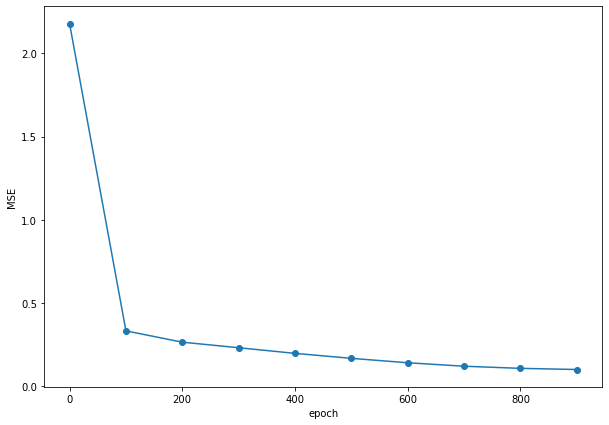

In [40]:
# 打印输出损失值
fig = plt.figure(figsize=(10, 7))
plt.plot(np.arange(len(losses))*100,losses, 'o-')
plt.xlabel('epoch')
plt.ylabel('MSE')

### 法二：調用PyTorch現成函數

In [41]:
# 定义神经网络架构，features.shape[1]个输入层单元，10个隐含层，1个输出层
input_size = features.shape[1]
hidden_size = 10
output_size = 1
batch_size = 128
neu = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size),
)
cost = torch.nn.MSELoss()
optimizer = torch.optim.SGD(neu.parameters(), lr = 0.01)

### 資料的分批次處理

In [42]:
# 神经网络训练循环
losses = []
for i in range(1000):
    # 每128个样本点被划分为一个撮，在循环的时候一批一批地读取
    batch_loss = []
    # start和end分别是提取一个batch数据的起始和终止下标
    for start in range(0, len(X), batch_size):
        end = start + batch_size if start + batch_size < len(X) else len(X)
        xx = torch.tensor(X[start:end], dtype = torch.float, requires_grad = True)
        yy = torch.tensor(Y[start:end], dtype = torch.float, requires_grad = True)
        predict = neu(xx)
        loss = cost(predict, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.data.numpy())
    
    # 每隔100步输出一下损失值（loss）
    if i % 100==0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

0 0.9064009
100 0.27749205
200 0.23936418
300 0.18212257
400 0.1267493
500 0.09265516
600 0.07855766
700 0.07206155
800 0.068136476
900 0.06548201


Text(0, 0.5, 'MSE')

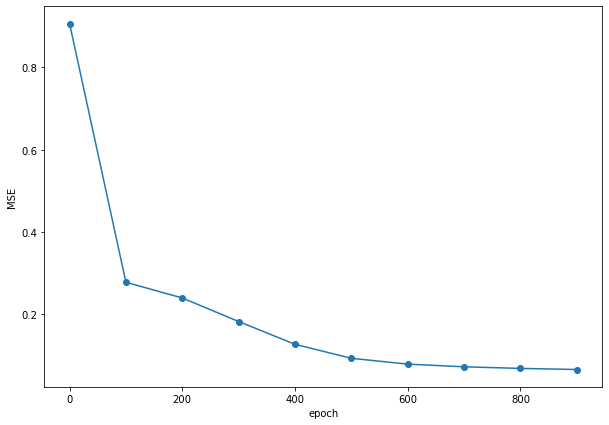

In [43]:
# 打印输出损失值
fig = plt.figure(figsize=(10, 7))
plt.plot(np.arange(len(losses))*100,losses, 'o-')
plt.xlabel('epoch')
plt.ylabel('MSE')

## 測試神經網路

[[171.07532  ]
 [102.688614 ]
 [ 11.788239 ]
 [ 10.442688 ]
 [  8.197693 ]
 [ -0.6334686]
 [ 13.3628235]
 [ 27.548859 ]
 [143.31013  ]
 [412.99982  ]]


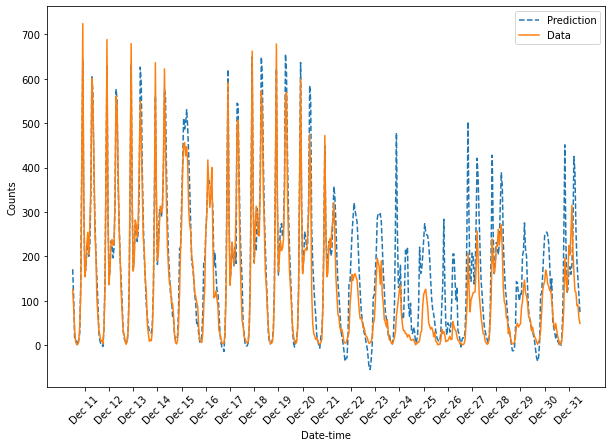

In [56]:
# 用训练好的神经网络在测试集上进行预测
targets = test_targets['cnt'] #读取测试集的cnt数值
targets = targets.values.reshape([len(targets),1]) #将数据转换成合适的tensor形式
targets = targets.astype(float) #保证数据为实数

x = Variable(torch.FloatTensor(test_features.values))
y = Variable(torch.FloatTensor(targets))

# print(x[:10])
# 用神经网络进行预测
predict = neu(x)
predict = predict.data.numpy()

print((predict * std + mean)[:10])


# 将后21天的预测数据与真实数据画在一起并比较
# 横坐标轴是不同的日期，纵坐标轴是预测或者真实数据的值
fig, ax = plt.subplots(figsize = (10, 7))

mean, std = scaled_features['cnt']
ax.plot(predict * std + mean, label='Prediction', linestyle = '--')
ax.plot(targets * std + mean, label='Data', linestyle = '-')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')
# 对横坐标轴进行标注
dates = pd.to_datetime(rides.loc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

## 剖析神經網路

In [57]:
def feature(X, net):
    # 定义了一个函数可以提取网络的权重信息，所有的网络参数信息全部存储在了neu的named_parameters集合中了
    X = torch.tensor(X, dtype = torch.float, requires_grad = False)
    dic = dict(net.named_parameters()) #提取出来这个集合
    weights = dic['0.weight'] #可以按照层数.名称来索引集合中的相应参数值
    biases = dic['0.bias'] #可以按照层数.名称来索引集合中的相应参数值
    h = torch.sigmoid(X.mm(weights.t()) + biases.expand([len(X), len(biases)])) # 隐含层的计算过程
    return h # 输出层的计算

In [58]:
# 选出三天预测不准的日期：Dec 22，23，24
# 将这三天的数据聚集到一起，存入subset和subtargets中
bool1 = rides['dteday'] == '2012-12-22'
bool2 = rides['dteday'] == '2012-12-23'
bool3 = rides['dteday'] == '2012-12-24'

# 将三个布尔型数组求与
bools = [any(tup) for tup in zip(bool1,bool2,bool3) ]
# 将相应的变量取出来
subset = test_features.loc[rides[bools].index]
subtargets = test_targets.loc[rides[bools].index]
subtargets = subtargets['cnt']
subtargets = subtargets.values.reshape([len(subtargets),1])

### 還原歸一化前的資料

In [59]:
# 将这几天的数据输入到神经网络中，读取出隐含层神经元的激活数值，存入results中
results = feature(subset.values, neu).data.numpy()
# 这些数据对应的预测值（输出层）
predict = neu(torch.tensor(subset.values, dtype = torch.float, requires_grad = True)).data.numpy()

#将预测值还原成原始数据的数值范围
mean, std = scaled_features['cnt']
predict = predict * std + mean
subtargets = subtargets * std + mean

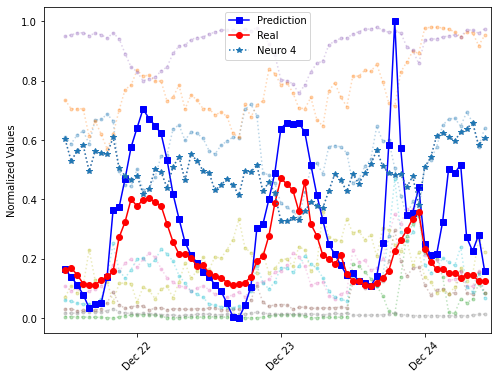

In [60]:
# 将所有的神经元激活水平画在同一张图上，蓝色的是模型预测的数值
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(results[:,:],'.:',alpha = 0.3)
ax.plot((predict - min(predict)) / (max(predict) - min(predict)),'bs-',label='Prediction')
ax.plot((subtargets - min(predict)) / (max(predict) - min(predict)),'ro-',label='Real')
ax.plot(results[:, 3],':*',alpha=1, label='Neuro 4')

ax.set_xlim(right=len(predict))
ax.legend()
plt.ylabel('Normalized Values')

dates = pd.to_datetime(rides.loc[subset.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

Text(0, 0.5, 'Weight')

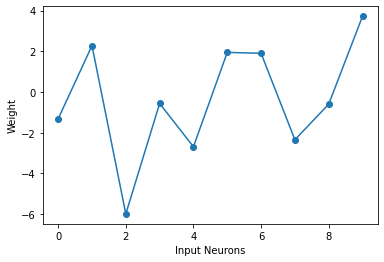

In [61]:
# 找到了与峰值响应的神经元，把它到输入层的权重输出出来
dic = dict(neu.named_parameters())
weights = dic['2.weight']
plt.plot(weights.data.numpy()[0],'o-')
plt.xlabel('Input Neurons')
plt.ylabel('Weight')